# Simple toy case with N halos

In [64]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [65]:
# either import the beorn module as installed package
try:
    import beorn
except ImportError:
    # or import it from the source directory
    import sys
    sys.path.append(os.path.abspath('../src'))
    import beorn

from beorn import run
from beorn import functions
from beorn import plotting
from beorn import global_qty
from beorn.astro import f_star_Halo
from beorn.parameters import Parameters

### Create a fake halo catalogs
Let us a create fake halo catalogs containing 100 halos with final masses $M_h=10^{12} M_\mathrm{sun}$ at $z=6$ that have been growing exponentially.

In [66]:
def exp_mar(z,M0=1e12,z0=6):
    return M0*np.exp(-0.79*(z-z0))

In [67]:
halo_catalog_dir = './fake_halo_catalogs/'
halo_catalog_name = 'halo_dict_z'
if not os.path.exists(halo_catalog_dir):
    os.mkdir(halo_catalog_dir)
z_array = np.flip(np.arange(6,25,0.5))
Lbox  = 100 # cMpc/h
Ncell = 128 # (128)**3 grid cells



In [68]:
### create halo catalogs dictionnaries at each redshift and store them.

nbr_halos = 100
Mh_z6 = np.full(nbr_halos,1e12)
z0=6
Z = np.random.rand(nbr_halos)*Lbox  
Y = np.random.rand(nbr_halos)*Lbox  
X = np.random.rand(nbr_halos)*Lbox  

print('Creating fake halo catalogs with',nbr_halos,'halos distributed randomly in the box.',\
      'They have final masses ',Mh_z6,'at z =',z0,'and grow exponentially.')

for zi in z_array:
    h_dict={}
    h_dict['M'] = exp_mar(zi,M0=Mh_z6,z0=z0)
    h_dict['z'] = zi
    h_dict['Lbox'] = Lbox
    h_dict['X'] = X
    h_dict['Y'] = Y
    h_dict['Z'] = Z
    
    functions.save_f(file=halo_catalog_dir + halo_catalog_name + functions.z_string_format(zi),obj=h_dict)
    

Creating fake halo catalogs with 100 halos distributed randomly in the box. They have final masses  [1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12
 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12 1.e+12] at z = 6 and grow exponentially.


In [69]:
print('Fake halo catalogs produced. They are stored here:', halo_catalog_dir)

Fake halo catalogs produced. They are stored here: ./fake_halo_catalogs/


### Source model.  Let's pick a flat fstar

In [70]:
parameters = Parameters()

# Halo Mass bins
parameters.simulation.halo_mass_bin_min = 1e7
parameters.simulation.halo_mass_bin_max = 1e15
parameters.simulation.halo_mass_bin_n = 40  # nbr of halo mass bin

# name your simulation
parameters.simulation.model_name = '4_halos_with_PBC'
# Nbr of cores to use
parameters.simulation.cores = 2

# simulation redshifts
parameters.solver.Nz = z_array

# cosmo
parameters.cosmology.Om = 0.31
parameters.cosmology.Ob = 0.045
parameters.cosmology.Ol = 0.69
parameters.cosmology.h = 0.68

# Source parameters
# lyman-alpha 
parameters.source.n_lyman_alpha_photons = 9690*10  # 1500
parameters.source.lyman_alpha_power_law = 0.0
# ion
parameters.source.Nion = 5000 * 3 
# xray
parameters.source.energy_cutoff_min_xray = 500
parameters.source.energy_cutoff_max_xray = 2000
parameters.source.energy_min_sed_xray = 500
parameters.source.energy_max_sed_xray = 2000
parameters.source.alS_xray = 1.5
parameters.source.xray_normalisation = 3.4e40 * 3

# fesc
parameters.source.f0_esc = 0.2
parameters.source.pl_esc = 0

# fstar
parameters.source.f_st = 1
parameters.source.g1 = 0
parameters.source.g2 = 0
parameters.source.g3 = 4
parameters.source.g4 = -1
parameters.source.Mp = 1.6e11 * parameters.cosmology.h
parameters.source.Mt = 1e7

# Minimum star forming halo
parameters.source.halo_mass_min = 1e5

# Mass Accretion Rate model (EXP or EPS)
parameters.source.mass_accretion_model = 'EXP'


In [71]:
run.compute_profiles(parameters)

Computing Temperature (Tk), Lyman-α and ionisation fraction (xHII) profiles...
param.solver.Nz is given as a np array.
param.solver.fXh is set to constant. We will assume f_X,h = 2e-4**0.225
...  Profiles stored in dir ./profiles.
 
It took 00:01:12 to compute the profiles.


z, Mh =  13.0 , 7.39e+08
z, Mh =  10.0 , 7.90e+09
z, Mh =  8.0 , 3.84e+10


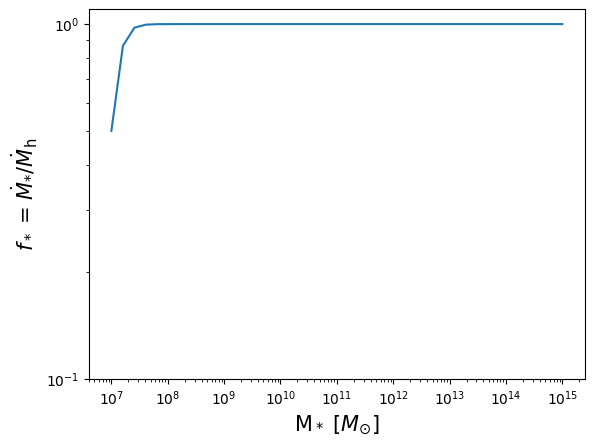

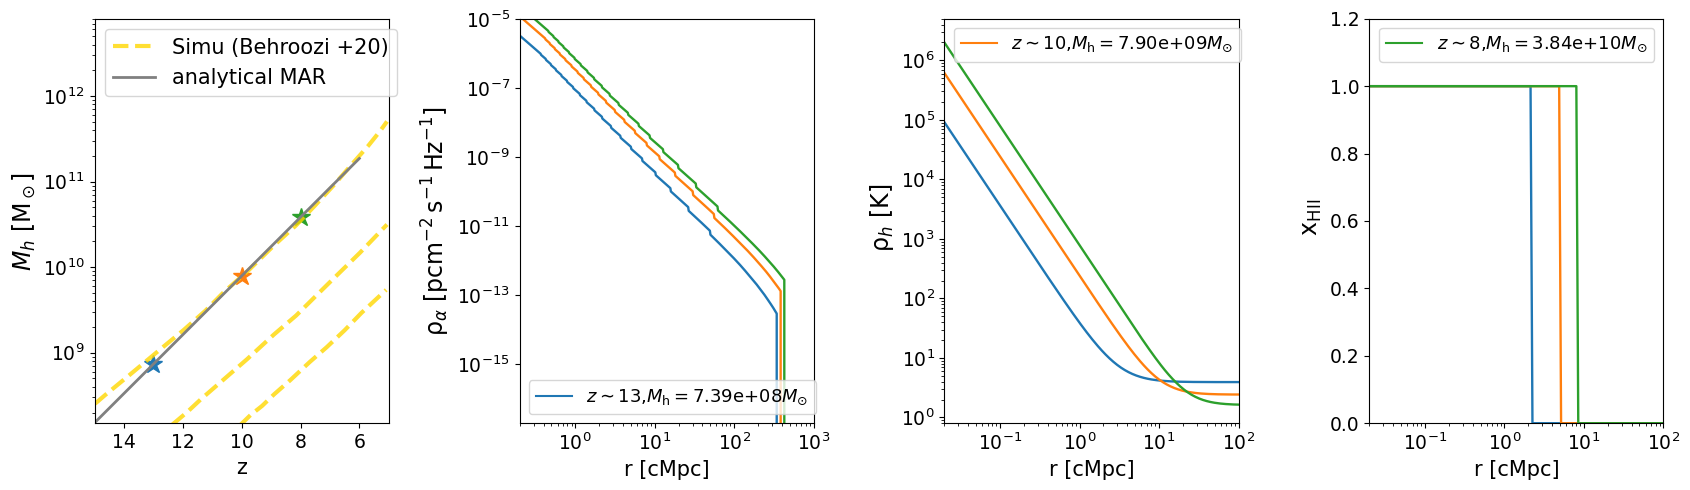

In [72]:
profiles = functions.load_f('./profiles/4_halos_with_PBC.pkl')
ind_M = 20
plt.loglog(profiles.M_Bin,f_star_Halo(parameters,profiles.M_Bin))
plt.ylim(0.1,1.1)
plt.ylabel(r'$f_*$ = $\dot{M}_{*}/\dot{M}_{\mathrm{h}}  $', fontsize=15)
plt.xlabel('M$_*$ $[M_{\odot}]$', fontsize=15)

plotting.plot_1D_profiles(parameters,profiles,ind_M,z_liste=[13,10,8])

## Estimate Tk, xHII, dTb quickly to recalibrate the model parameters

In [73]:
parameters.simulation.Lbox  = Lbox
parameters.simulation.Ncell = Ncell
parameters.simulation.halo_catalogs = halo_catalog_dir+halo_catalog_name  ## path to dir with halo catalogs + filename
parameters.simulation.dens_field  = None
parameters.simulation.store_grids = ['Tk','bubbles','lyal' ,'dTb'] 

# define k bins for PS measurement
kmin = 1 / Lbox
kmax = Ncell / Lbox
kbin = int(6 * np.log10(kmax / kmin))
parameters.simulation.kmin = kmin
parameters.simulation.kmax = kmax
parameters.simulation.kbin = kbin


In [74]:
# Quick calculation of the global quantities from the distribution of halos and the 1D profiles (similar to eq 11 in 2302.06626)
GS = global_qty.compute_glob_qty(parameters)
functions.save_f(file='./physics/GS_approx_' + parameters.simulation.model_name + '.pkl',obj = GS)


Computing global quantities (sfrd, Tk, xHII, dTb, xal, xcoll) from 1D profiles and halo catalogs....
param.solver.Nz is given as a np array.
....done. Returns a dictionnary.


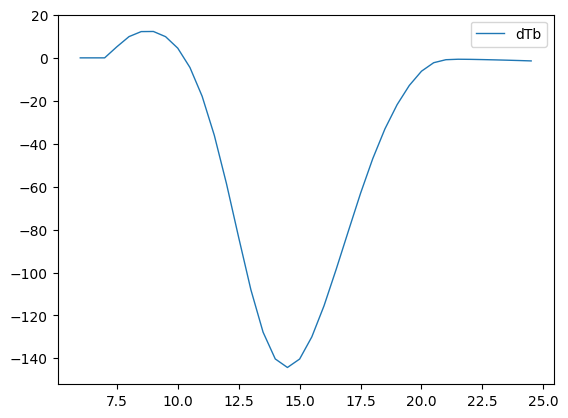

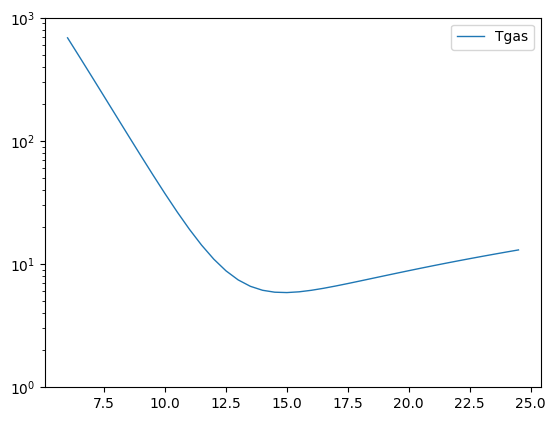

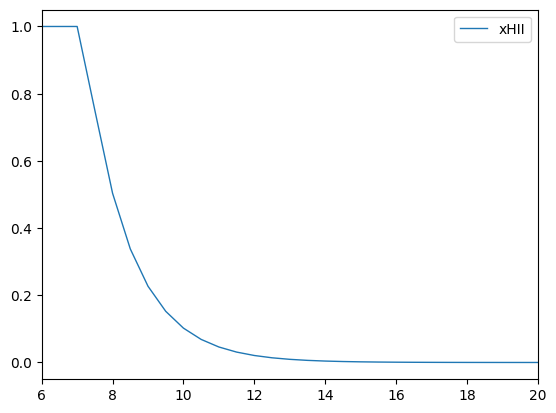

In [75]:
GS_approx = functions.load_f('./physics/GS_approx'+'_' + parameters.simulation.model_name + '.pkl')
plotting.plot_Beorn(GS_approx, qty='dTb', xlim=None, ylim=None, label='dTb', color='C0', ls='-', lw=1, alpha=1)
plt.show()
plotting.plot_Beorn(GS_approx, qty='Tk', xlim=None, ylim=None, label='Tgas', color='C0', ls='-', lw=1, alpha=1)
plt.semilogy()
plt.ylim(1,1e3)
plt.show()
plotting.plot_Beorn(GS_approx, qty='x_HII', xlim=(6,20), ylim=None, label='xHII', color='C0', ls='-', lw=1, alpha=1)


## Paint profiles on 3D grids
We assume constant density i.e. `param.sim.dens_field=None`

In [76]:
run.paint_boxes(
    parameters,
    RSD = False,
    ion = True,
    temp = True,
    dTb = True,
    lyal = True,
    cross_corr = False # no density field 
)


Painting profiles on a grid with 128 pixels per dim. Box size is 100 cMpc/h.
param.solver.Nz is given as a np array.
Core nbr 0 is taking care of z =  24.5
dTb map for z =  24.5 already painted. Skipping.
Core nbr 0 is taking care of z =  24.0
dTb map for z =  24.0 already painted. Skipping.
Core nbr 0 is taking care of z =  23.5
dTb map for z =  23.5 already painted. Skipping.
Core nbr 0 is taking care of z =  23.0
dTb map for z =  23.0 already painted. Skipping.
Core nbr 0 is taking care of z =  22.5
dTb map for z =  22.5 already painted. Skipping.
Core nbr 0 is taking care of z =  22.0
dTb map for z =  22.0 already painted. Skipping.
Core nbr 0 is taking care of z =  21.5
dTb map for z =  21.5 already painted. Skipping.
Core nbr 0 is taking care of z =  21.0
dTb map for z =  21.0 already painted. Skipping.
Core nbr 0 is taking care of z =  20.5
dTb map for z =  20.5 already painted. Skipping.
Core nbr 0 is taking care of z =  20.0
dTb map for z =  20.0 already painted. Skipping.
Cor

Ncell is  128
Ncell is  128


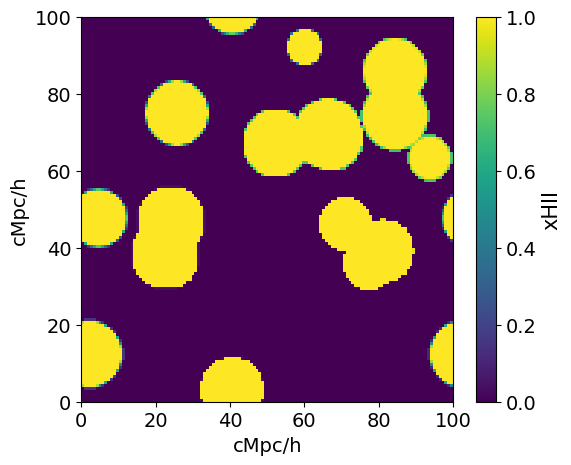

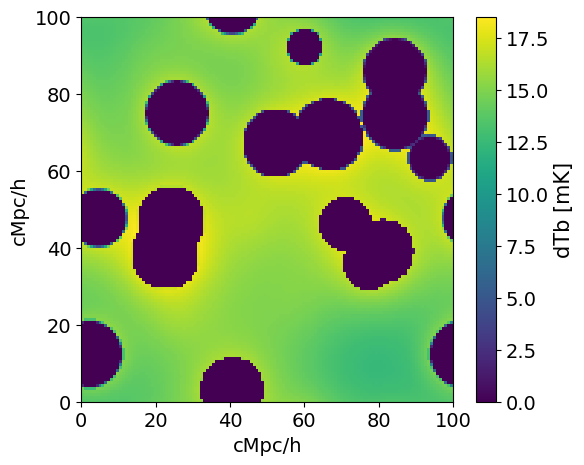

In [77]:
zz = 9
xHII_grid = functions.load_grid(parameters,z=zz,type='bubbles')
plotting.plot_2d_map(xHII_grid,100,64, qty='xHII')


dTb_grid = functions.load_grid(parameters,z=zz,type='dTb')
plotting.plot_2d_map(dTb_grid,100,64,scale = 'lin', qty='dTb [mK]')


In [78]:
# Step 3 : gather the GS_PS files at different redshifts and create a single GS_PS.pkl file.
run.gather_GS_PS_files(parameters, remove = True)


param.solver.Nz is given as a np array.


## Plot global quantities and power spectra computed from boxes

[]


TypeError: unsupported operand type(s) for -: 'list' and 'float'

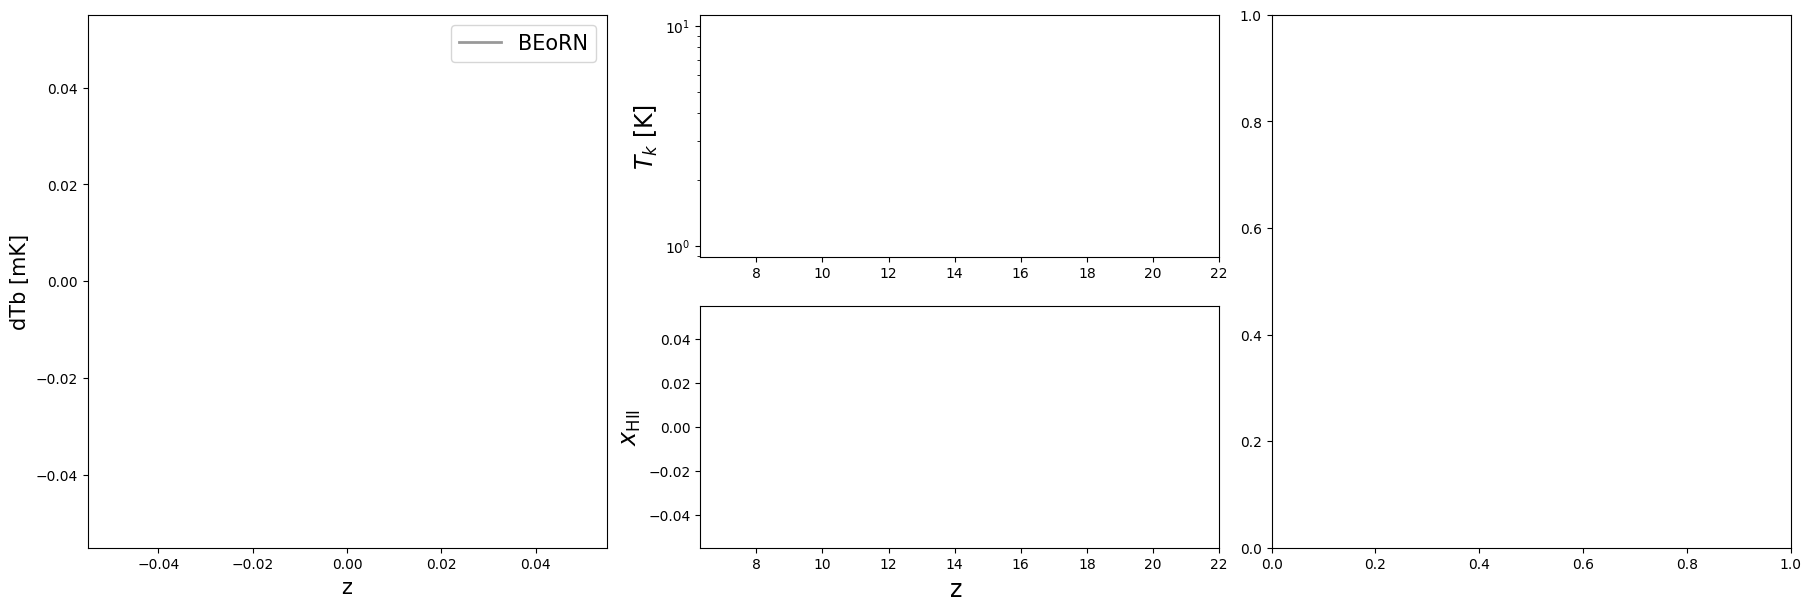

In [ ]:
##### Plot the results (dTb, Tk, xHII, PS_dTb(z))
import matplotlib.gridspec as gridspec

fig = plt.figure(constrained_layout=True)
fig.set_figwidth(18)

fig.set_figheight(6)

gs = gridspec.GridSpec(2, 3, figure=fig)

ax1 = fig.add_subplot(gs[:,0])
ax2 = fig.add_subplot(gs[0,1])
ax3 = fig.add_subplot(gs[1,1],sharex=ax2)
ax4 = fig.add_subplot(gs[:,2])
    
    

GS_PS = functions.load_f('./physics/GS_PS_' + str(parameters.simulation.Ncell) + '_' + parameters.simulation.model_name + '.pkl')
#GS_approx = load_f('./physics/GS_approx'+'_' + param.sim.model_name + '.pkl')

ax1.plot(GS_PS['z'],GS_PS['dTb'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax1.plot(GS_approx['z'],GS_approx['dTb'],ls='--',label='')
ax1.legend(fontsize=15,loc='upper right')
#ax1.set_xlim(6,20)
#ax1.set_ylim(-62,13)
ax1.set_xlabel('z',fontsize=15)
ax1.set_ylabel('dTb [mK]',fontsize=15)



ax2.plot(GS_PS['z'],GS_PS['Tk'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax2.plot(GS_approx['z'],GS_approx['Tk'],ls='--',color='gray')
ax2.semilogy([],[])
#ax2.set_ylim(1,1e2)
ax2.set_ylabel('$T_{k}$ [K]',fontsize=17)
#plt.show()


ax3.plot(GS_PS['z'],GS_PS['x_HII'],lw=2,alpha=0.8,ls='-',color='gray',label='BEoRN')
#ax3.plot(GS_approx['z'],GS_approx['x_HII'],ls='--',color='gray')
ax3.set_xlim(6.3,22)
ax3.set_ylabel('$x_{\mathrm{HII}}$',fontsize=17)
ax3.set_xlabel('z ',fontsize=17)


plotting.plot_Beorn_PS_of_z(0.1, GS_PS, GS_PS,ls='-',lw=1, color='b',RSD = False,label='k = 0.1 h/Mpc',qty='dTb',alpha=1,ax=plt)



ax4.set_ylim(1e-1,1e3)
#ax4.set_xlim(5.8,22)
ax4.set_ylabel('$\Delta_{21}^{2}(k,z)$ [mK]$^{2}$ ',fontsize=18) # k^{3}P(k)/(2\pi^{2})
ax4.set_xlabel('z ',fontsize=17)
ax4.legend(loc='best',fontsize=15)

ax2.axes.get_xaxis().set_visible(False)
plt.show()


## Differetntial brightness temperature Lightcones

In [ ]:
from beorn.lightcones import Lightcone 
slice_nbr = 80
lightcone_ = Lightcone(parameters,qty='dTb',slice_nbr = slice_nbr)
lightcone_.load_boxes()
lightcone_.generate_lightcones()
lightcone_.plotting_lightcone()

## Ionization fraction Lightcones


param.solver.Nz is given as a np array.
nGrid is 128 . Lbox is 100 Mpc. Plotting lightcone for z = [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ] and slice nbr 80
Loading boxes...
Generating lightcones...
scale_fac : [0.03921569 0.04       0.04081633 0.04166667 0.04255319 0.04347826
 0.04444444 0.04545455 0.04651163 0.04761905 0.04878049 0.05
 0.05128205 0.05263158 0.05405405 0.05555556 0.05714286 0.05882353
 0.06060606 0.0625     0.06451613 0.06666667 0.06896552 0.07142857
 0.07407407 0.07692308 0.08       0.08333333 0.08695652 0.09090909
 0.0952381  0.1        0.10526316 0.11111111 0.11764706 0.125
 0.13333333 0.14285714] z :  [24.5 24.  23.5 23.  22.5 22.  21.5 21.  20.5 20.  19.5 19.  18.5 18.
 17.5 17.  16.5 16.  15.5 15.  14.5 14.  13.5 13.  12.5 12.  11.5 11.
 10.5 10.   9.5  9.   8.5  8.   7.5  7.   6.5  6. ]
Making lightcone between 0

100%|██████████| 547/547 [00:00<00:00, 1626.45it/s]


...done
Range for Lightcone plot is : 0.0 1.0
1


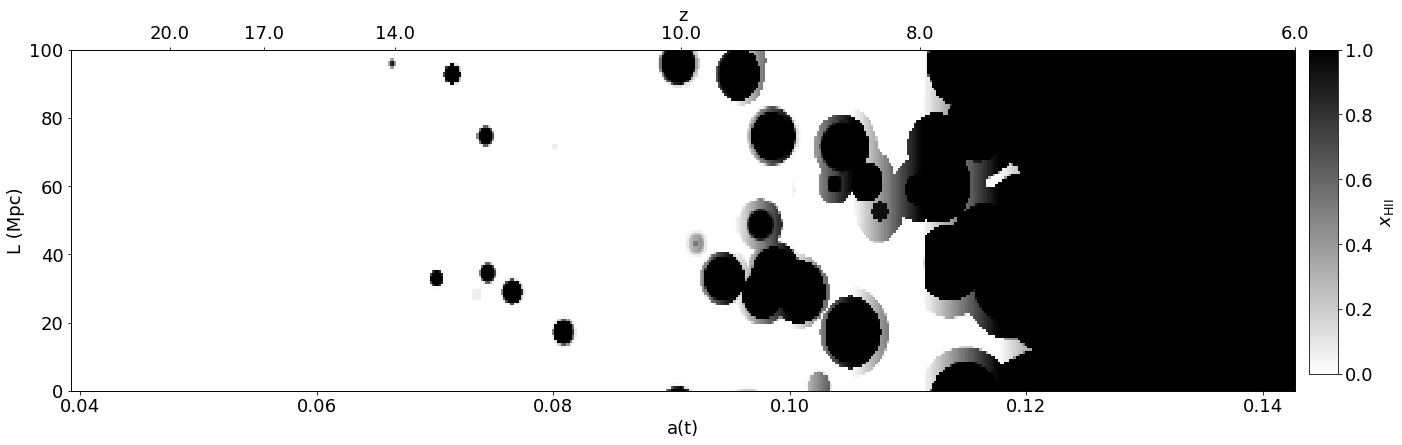

In [ ]:
lightcone_ = Lightcone(parameters, qty = 'bubbles', slice_nbr = slice_nbr)
lightcone_.load_boxes()
lightcone_.generate_lightcones()
lightcone_.plotting_lightcone()
